# Feature scaling with sklearn - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. This exercise is very similar to a previous one. This time, however, **please standardize the data**.

Apart from that, please:
-  Display the intercept and coefficient(s)
-  Find the R-squared and Adjusted R-squared
-  Compare the R-squared and the Adjusted R-squared
-  Compare the R-squared of this regression and the simple linear regression where only 'size' was used
-  Using the model make a prediction about an apartment with size 750 sq.ft. from 2009
-  Find the univariate (or multivariate if you wish - see the article) p-values of the two variables. What can you say about them?
-  Create a summary table with your findings

In this exercise, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

## Load the data

In [4]:
data = pd.read_csv("real_estate_price_size_year.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
 2   year    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
data.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


## Create the regression

### Declare the dependent and the independent variables

In [6]:
x = data[['size', 'year']].to_numpy()
print(x.shape)
y = data['price'].to_numpy()
print(y.shape)

(100, 2)
(100,)


### Scale the inputs

In [7]:
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(x)
print(scaler.mean_, scaler.var_)
x_scaled = scaler.transform(x)

[ 853.0242 2012.6   ] [8.78817119e+04 2.21400000e+01]


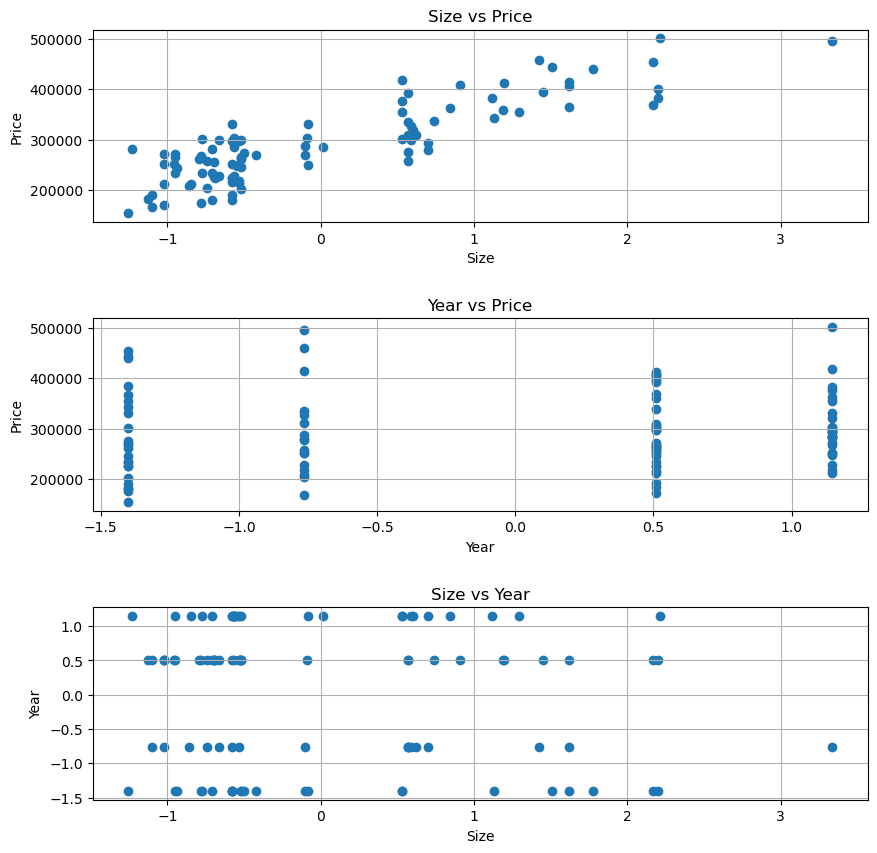

In [12]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.title("Size vs Price")
plt.scatter(x_scaled[:, 0], y)
plt.grid()
plt.xlabel("Size")
plt.ylabel("Price")

plt.subplot(3, 1, 2)
plt.title("Year vs Price")
plt.scatter(x_scaled[:, 1], y)
plt.grid()
plt.xlabel("Year")
plt.ylabel("Price")

plt.subplot(3, 1, 3)
plt.title("Size vs Year")
plt.scatter(x_scaled[:, 0], x_scaled[:, 1])
plt.grid()
plt.xlabel("Size")
plt.ylabel("Year")

plt.subplots_adjust(hspace=0.5)
plt.show()

### Regression

In [8]:
model = LinearRegression(fit_intercept=True)
model.fit(x_scaled, y)

LinearRegression()

### Find the intercept

In [9]:
model.intercept_

292289.4701599997

### Find the coefficients

In [10]:
model.coef_

array([67501.57614152, 13724.39708231])

### Calculate the R-squared

In [13]:
model.score(x_scaled, y)

0.7764803683276793

### Calculate the Adjusted R-squared

In [14]:
def adjusted_r_square(x, y, model):
    r2 = model.score(x, y)
    return 1 - (1-r2) * (x.shape[0] -1) / (x.shape[0] - x.shape[1] - 1)

In [15]:
adjusted_r_square(x_scaled, y, model)

0.77187171612825

### Compare the R-squared and the Adjusted R-squared

$R^2 = 0.7764$

$R^2_{adj} = 0.7718$

### Compare the Adjusted R-squared with the R-squared of the simple linear regression

Simple Linear Regression: 0.7447

Multiple Linear Regression: 0.7718

### Making predictions

Find the predicted price of an apartment that has a size of 750 sq.ft. from 2009.

In [16]:
model.predict(scaler.transform(np.array([[750.0, 2009]])))

array([258330.34465995])

### Calculate the univariate p-values of the variables

In [18]:
f_statistics, p_value = f_regression(x_scaled, y)
print(f_statistics)
print(p_value)

[285.92105192   0.85525799]
[8.12763222e-31 3.57340758e-01]


### Create a summary table with your findings

In [19]:
summary = pd.DataFrame(data=['Size', 'Year'], columns=['Features'])
summary['P-Values'] = p_value.round(3)
summary['F statistics'] = f_statistics.round(3)

In [20]:
summary.head()

,Features,P-Values,F statistics
0,Size,0.000,285.921
1,Year,0.357,0.855


Answer...